# Computational Checks for Simulation of Radial Concentration Profiles

In [6]:

import sys, os, time, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy.special import kn
sys.path.append(os.path.abspath('../pde-sim-transfer/'))
from pde_sim_returns_camp import *

# from pde_sim_worker import *
# import pde_sim_worker_hill as hill
# from pde_sim_grid_scan import *
# import test_cases

# load the autoreload extension
%load_ext autoreload
# Set extension to reload modules every time before executing code
%autoreload 2

beep = lambda x: os.system("echo -n '\a';sleep 0.2;" * x)
if not 'nb_dir' in globals():
    nb_dir = os.getcwd()
print('notebook is at: ' + nb_dir)
#todo: test or google how sys.path[0] is initialized in a .py file  
# transfer_dir = f"{nb_dir}/../pde-sim-transfer"
# os.chdir(transfer_dir)

# #import rcm
# module_dir = os.path.join(sys.path[0],'../../')
# if module_dir not in sys.path:
#     sys.path.append(module_dir)
# import radial_cell_motion as rcm


#import pdesim
transfer_dir = os.path.join(module_dir,'pde-sim/pde-sim-transfer')
if transfer_dir not in sys.path:
    sys.path.append(transfer_dir)
import pde_sim_returns_camp as pdesim


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
notebook is at: /Users/timothytyree/Documents/GitHub/radial_cell_motion/pde-sim/nb


# constant flux yields constant increase of net cAMP

In [ ]:

cnet_values,t_values = simulate(kPDE=0., 
                                LPDE=100.0, 
                                c0=0.0, 
                                T=10.0, 
                                iter_no=2.0, 
                                dt=0.005, 
                                time_res = 10.0, 
                                use_constant_fluxLeft=True);

In [ ]:
x_values = t_values
y_values = cnet_values
print(f"$dc_net(t)/dt$ = {np.mean(np.diff(y_values))/np.mean(np.diff(x_values))} nM µm^2 / sec.")

where
$$c_\text{net}(t) = \sum_{r=r_0=50\mu m}^{1000\,\mu m}c(r,t)\bigg(2\pi r dr + \pi dr^2   \bigg)$$

In [ ]:
plt.scatter(x=x_values, y=y_values)
plt.xlabel('time (seconds)', fontsize=24)
plt.ylabel('$c_{net}$ ($nM\cdot µm^2$)', fontsize=24)
plt.show()

In [ ]:
print(f"cAMP rate of change is {np.mean(np.diff(y_values))/np.mean(np.diff(x_values))}.")


# time dependent flux example profiles 
Parameters match those in Fig. 3F

In [ ]:
os.chdir(nb_dir+"/../pde-sim-transfer")

In [ ]:
# compute results for T = 10 minute period
T10t5  = !python3 pde_sim_returns_camp.py 0.02 100.0 12.0 10.0 0.5 0.005 10.0 #outputs c(r) at time t = 5 min  for T = 10 min
T10t10 = !python3 pde_sim_returns_camp.py 0.02 100.0 12.0 10.0 1.0 0.005 10.0 #outputs c(r) at time t = 10 min for T = 10 min
T10t15 = !python3 pde_sim_returns_camp.py 0.02 100.0 12.0 10.0 1.5 0.005 10.0 #outputs c(r) at time t = 15 min for T = 10 min
T10t20 = !python3 pde_sim_returns_camp.py 0.02 100.0 12.0 10.0 2.0 0.005 10.0 #outputs c(r) at time t = 10 min for T = 10 min

In [ ]:
# compute results for T = 20 minute period
T20t10 = !python3 pde_sim_returns_camp.py 0.02 100.0 12.0 20.0 0.5 0.005 10.0 
T20t20 = !python3 pde_sim_returns_camp.py 0.02 100.0 12.0 20.0 1.0 0.005 10.0
T20t30 = !python3 pde_sim_returns_camp.py 0.02 100.0 12.0 20.0 1.5 0.005 10.0
T20t40 = !python3 pde_sim_returns_camp.py 0.02 100.0 12.0 20.0 2.0 0.005 10.0

# where the parameters are the following
# - kPDE = 0.02/sec, 
# - D = 100µm^2/sec, 
# - c0 = 12.0nM, 
# - T=10.0min, or 20.0 min
# - iter_no = 2.0 # the number of pulses to integrate (returned time = tmax = iter_no*T)
# - dt = 0.005sec
# - time_res = 10.0min # the frequency data is printed.


In [ ]:
T10_t5  = simulate(kPDE = 0.02, LPDE = 100.0, c0 = 12.0, T = 10.0, iter_no 0.5 0.005 10.0 #outputs c(r) at time t = 5 min  for T = 10 min


In [ ]:
beep(3)

In [ ]:
print(T10t5)

# time dependent radial flux example profiles 
Parameters match those in Fig. 3F

In [ ]:
import pandas as pd
import numpy as np
from scipy.special import kn #modified bessel function of the second kind of integer order n
from scipy.interpolate import BSpline

## simulate some results for T = 10 minutes

In [ ]:
T = 10 #period in minutes
Ts   = np.multiply(T,60.)

c0 = 12 #nM
kPDE = 0.02#/sec
LPDE = 100.#um
D = 100#um^2/sec diffusion coefficient of cAMP

#  make the mesh
r0   = 50. #um
Lr   = 1000.#um
dr   = 1.  #um
dt   =  0.005

#period of signal in seconds
rmesh= np.arange(r0,Lr+dr,dr)
c    = 0.*rmesh

#  define default parameters
F0   = 10**4


In [ ]:
#  precompute realistic periodic camp signaling
t_list  = np.around(np.arange(0,Ts+dt,dt),4)
spl     = import_mg_source(period=T)
dsource = evaluate_mg_source(spl, t_list)
phi     = lambda t: F0*dsource[np.around(t,4)]/rmesh[0]

#cylindrical FEM with localized PDE decay
# define b.c.'s in units of slope #concentration difference per time step
fluxLeft = lambda t:phi(t%Ts)
fluxRight= 0./rmesh[-1]

#initialize field values
c = c0+0.*rmesh
pde = kn(0,rmesh/LPDE)/kn(0,r0/LPDE)#constitutive pde production in 2D radial coords


In [ ]:
time = 0. #seconds

#integrate up to time = 5 minutes
tstop = 5*60.
while time < tstop:
    dcdt = time_step(c, pde, rmesh, D, kPDE, dr, fluxLeft(time), fluxRight=0)
    c += dt*dcdt
    time += dt
T10t5 = c.copy()

#integrate up to time = 10 minutes
tstop = 10*60.
while time < tstop:
    dcdt = time_step(c, pde, rmesh, D, kPDE, dr, fluxLeft(time), fluxRight=0)
    c += dt*dcdt
    time += dt
T10t10 = c.copy()

#integrate up to time = 15 minutes
tstop = 15*60.
while time < tstop:
    dcdt = time_step(c, pde, rmesh, D, kPDE, dr, fluxLeft(time), fluxRight=0)
    c += dt*dcdt
    time += dt
T10t15 = c.copy()

#integrate up to time = 20 minutes
tstop = 20*60.
while time < tstop:
    dcdt = time_step(c, pde, rmesh, D, kPDE, dr, fluxLeft(time), fluxRight=0)
    c += dt*dcdt
    time += dt
T10t20 = c.copy()

#integrate up to time = 20 minutes
tstop = 20*60.
while time < tstop:
    dcdt = time_step(c, pde, rmesh, D, kPDE, dr, fluxLeft(time), fluxRight=0)
    c += dt*dcdt
    time += dt
T10t20 = c.copy()

#integrate up to time = 30 minutes
tstop = 30*60.
while time < tstop:
    dcdt = time_step(c, pde, rmesh, D, kPDE, dr, fluxLeft(time), fluxRight=0)
    c += dt*dcdt
    time += dt
T10t30 = c.copy()

#integrate up to time = 40 minutes
tstop = 40*60.
while time < tstop:
    dcdt = time_step(c, pde, rmesh, D, kPDE, dr, fluxLeft(time), fluxRight=0)
    c += dt*dcdt
    time += dt
T10t40 = c.copy()

In [ ]:
beep(1)

In [ ]:
## Plot ^these results

rmeshd = rmesh[:-1]
thresh = 0.1/15 #threshold camp gradient for cell sensing in nM/um
savedir = nb_dir+"/../fig"
os.chdir(savedir)

## Plot ^these results
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (14,6))
fontsize = 20
text_params = {"fontsize":fontsize}#, "fontweight":"bold"}
plot_params = {'lw' : 4, 'alpha' : 0.7}

#plot data
ax1.plot(rmesh,T10t10, label = "t = 10 min", **plot_params)
ax1.plot(rmesh,T10t20, label = "t = 20 min", **plot_params)
ax1.plot(rmesh,T10t30, label = "t = 30 min", **plot_params)
ax1.plot(rmesh,T10t40, label = "t = 40 min", **plot_params)
ax1.plot(rmesh,T10t5, label = "t = 5 min" , **plot_params)
ax1.plot(rmesh,T10t15, label = "t = 15 min", **plot_params)
#format plot
ax1.set_title('cAMP profiles for T = 10 min', **text_params)
ax1.set_xlabel ('r (µm)', **text_params)
ax1.set_ylabel ('cAMP (nM)', **text_params)
ax1.tick_params(width = 2, length = 4)
ax1.yaxis.set_tick_params(labelsize=fontsize)
ax1.xaxis.set_tick_params(labelsize=fontsize)
ax1.legend(**text_params)

#plot data
ax2.plot(rmeshd,np.diff(T10t10), label = "t = 10 min", **plot_params)
ax2.plot(rmeshd,np.diff(T10t20), label = "t = 20 min", **plot_params)
ax2.plot(rmeshd,np.diff(T10t30), label = "t = 30 min", **plot_params)
ax2.plot(rmeshd,np.diff(T10t40), label = "t = 40 min", **plot_params)
ax2.plot(rmeshd,np.diff(T10t5), label = "t = 5 min" , **plot_params)
ax2.plot(rmeshd,np.diff(T10t15), label = "t = 15 min", **plot_params)
ax2.plot(rmeshd,thresh + 0.*rmeshd, **plot_params, color = 'black')

#format plot
ax2.set_title('cAMP gradients for T = 10 min', **text_params)
ax2.set_xlabel ('r (µm)', **text_params)
ax2.set_ylabel ('d(cAMP)/dr (nM/µm)', **text_params)
ax2.tick_params(width = 2, length = 4)
ax2.yaxis.set_tick_params(labelsize=fontsize)
ax2.xaxis.set_tick_params(labelsize=fontsize)
# ax2.legend(**text_params)
ax2.set_ylim((-0.02,0.03))
ax2.set_yticks((-0.02,-0.01,0,0.01,0.02, 0.03))

fig.tight_layout()
# plt.show()
fig.savefig('pde-sim-example_T_10.pdf')

## Plot ^these results
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (14,6))
fontsize = 20
text_params = {"fontsize":fontsize}#, "fontweight":"bold"}
plot_params = {'lw' : 4, 'alpha' : 0.7}

#plot data
ax1.plot(rmesh,T20t10, label = "t = 10 min" , **plot_params)
ax1.plot(rmesh,T20t20, label = "t = 20 min", **plot_params)
ax1.plot(rmesh,T20t30, label = "t = 30 min", **plot_params)
ax1.plot(rmesh,T20t40, label = "t = 40 min", **plot_params)
#format plot
ax1.set_title('cAMP profiles for T = 20 min', **text_params)
ax1.set_xlabel ('r (µm)', **text_params)
ax1.set_ylabel ('cAMP (nM)', **text_params)
ax1.tick_params(width = 2, length = 4)
ax1.yaxis.set_tick_params(labelsize=fontsize)
ax1.xaxis.set_tick_params(labelsize=fontsize)
ax1.legend(**text_params)

#plot data

#plot data
ax2.plot(rmeshd,np.diff(T20t10), label = "t = 10 min" , **plot_params)
ax2.plot(rmeshd,np.diff(T20t20), label = "t = 20 min", **plot_params)
ax2.plot(rmeshd,np.diff(T20t30), label = "t = 30 min", **plot_params)
ax2.plot(rmeshd,np.diff(T20t40), label = "t = 40 min", **plot_params)
ax2.plot(rmeshd,thresh + 0.*rmeshd, **plot_params, color = 'black')

#format plot
ax2.set_title('cAMP gradients for T = 20 min', **text_params)
ax2.set_xlabel ('r (µm)', **text_params)
ax2.set_ylabel ('d(cAMP)/dr (nM/µm)', **text_params)
ax2.tick_params(width = 2, length = 4)
ax2.yaxis.set_tick_params(labelsize=fontsize)
ax2.xaxis.set_tick_params(labelsize=fontsize)
# ax2.legend(**text_params)
ax2.set_ylim((-0.02,0.03))
ax2.set_yticks((-0.02,-0.01,0,0.01,0.02, 0.03))

fig.tight_layout()
# plt.show()
fig.savefig('pde-sim-example_T_20.pdf')



## simulate some results for T \in {20,21} minutes

In [2]:
# unstable at time step
dt   =  0.0001
kPDE = 0.8#/sec
LPDE = 40.#um
T    = 21 #period in minutes
D    = 100 #um^2/sec diffusion coefficient of cAMP
c0   = 12 #nM

# c0 = 12 #nM
# kPDE = 0.02#/sec
# LPDE = 100.#um
# T = 20 #period in minutes
# D = 100 #um^2/sec diffusion coefficient of cAMP

#  make the mesh
r0   =  50. #um
Lr   =  1000.#um
dr   =  1.  #um

#  define default parameters
F0   = 10**4
Ts   = np.multiply(T,60.)#period of signal in seconds
rmesh= np.arange(r0,Lr+dr,dr)

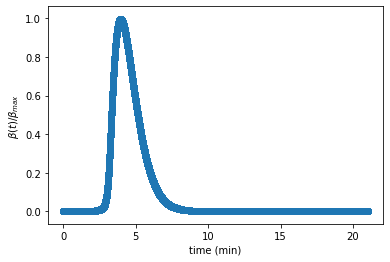

In [3]:
#TODO: SWITCH mg_source evaluation to a B-Spline (force fluxLeft to nonvolatile memory)
os.chdir(nb_dir)
#  precompute realistic periodic camp signaling
t_list  = np.around(np.arange(0,Ts+dt,dt),4)
spl     = import_mg_source(period=T)
dsource = evaluate_mg_source(spl, t_list)
phi     = lambda t: F0*dsource[np.around(t,4)]/rmesh[0]

#cylindrical FEM with localized PDE decay
# define b.c.'s in units of slope #concentration difference per time step
fluxLeft = lambda t:phi(t%Ts)
fluxRight= 0./rmesh[-1]

#initialize field values
c = c0+0.*rmesh
pde = kn(0,rmesh/LPDE)/kn(0,r0/LPDE)#constitutive pde production in 2D radial coords
plt.scatter(x=list(map((lambda x:x/60), list(dsource.keys()))), y=list(dsource.values()))
plt.xlabel('time (min)')
plt.ylabel(r'$\beta(t)/\beta_{max}$')
plt.show()

In [4]:
time = 0. #seconds
c    = c0+0.*rmesh
t1, t2, t3, t4, t5 = 21, 26, 31, 36, 41
# t1, t2, t3, t4 = 10, 20, 30, 40

#integrate up to time = t1 minutes
tstop = t1*60.
while time < tstop:
    dcdt = time_step(c, pde, rmesh, D, kPDE, dr, fluxLeft(time), fluxRight=0)
    c += dt*dcdt
    time += dt
Tt1 = c.copy()


In [ ]:
#initialize cells at r == 100, 200, 300


In [ ]:

#integrate up to time = t2 minutes
tstop = t2*60.
while time < tstop:
    dcdt = time_step(c, pde, rmesh, D, kPDE, dr, fluxLeft(time), fluxRight=0)
    c += dt*dcdt
    time += dt
        #TODO: Compute time series of cell movements
Tt2 = c.copy()

#integrate up to time = t3 minutes
tstop = t3*60.
while time < tstop:
    dcdt = time_step(c, pde, rmesh, D, kPDE, dr, fluxLeft(time), fluxRight=0)
    c += dt*dcdt
    time += dt
        #TODO: Compute time series of cell movements
Tt3 = c.copy()

#integrate up to time = t4 minutes
tstop = t4*60.
while time < tstop:
    dcdt = time_step(c, pde, rmesh, D, kPDE, dr, fluxLeft(time), fluxRight=0)
    c += dt*dcdt
    time += dt
    
        #TODO: Compute time series of cell movements
Tt4 = c.copy()

#integrate up to time = t5 minutes
tstop = t5*60.
while time < tstop:
    dcdt = time_step(c, pde, rmesh, D, kPDE, dr, fluxLeft(time), fluxRight=0)
    c += dt*dcdt
    time += dt
Tt5 = c.copy()

In [ ]:
beep(3)

In [ ]:
## TODO: use a just-in-time compiler like numba to functionally integrate in time
## TODO add progress bar/list to a funcitonal representation of time integration
# Hint: Example Usage:
# import time
# # A List of Items
# items = list(range(0, 57))
# l = len(items)
# # Initial call to print 0% progress
# printProgressBar(0, l, prefix = 'Progress:', suffix = 'Complete', length = 50)
# for i, item in enumerate(items):
#     # Do stuff...
#     time.sleep(0.1)
#     # Update Progress Bar
#     printProgressBar(i + 1, l, prefix = 'Progress:', suffix = 'Complete', length = 50)


## Plot ^these results

In [ ]:
rmeshd = rmesh[:-1]
thresh = 0.1/15 #threshold camp gradient for cell sensing in nM/um
savedir = nb_dir+"/../fig"
os.chdir(savedir)

In [ ]:
fontsize = 20
saving = True
text_params = {"fontsize":fontsize}#, "fontweight":"bold"}
plot_params = {'lw' : 4, 'alpha' : 0.7}

## Plot radial concentrations
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (14,6))

#TODO: abstract data to be plotted
# lst_x_values = []
# lst_y_values = []
# lst_labels   = []

#plot data
ax1.plot(rmesh,Tt1, label = f"t = {int(t1)} min" , **plot_params)
ax1.plot(rmesh,Tt2, label = f"t = {int(t2)} min", **plot_params)
ax1.plot(rmesh,Tt3, label = f"t = {int(t3)} min", **plot_params)
ax1.plot(rmesh,Tt4, label = f"t = {int(t4)} min", **plot_params)
ax1.plot(rmesh,Tt5, label = f"t = {int(t5)} min", **plot_params)

#format plot
ax1.set_title(f'cAMP profiles for T = {T} min', **text_params)
ax1.set_xlabel ('r (µm)', **text_params)
ax1.set_ylabel ('cAMP (nM)', **text_params)
ax1.tick_params(width = 2, length = 4)
ax1.yaxis.set_tick_params(labelsize=fontsize)
ax1.xaxis.set_tick_params(labelsize=fontsize)
ax1.legend(**text_params)

## Plot radial concentration gradients
#plot data
ax2.plot(rmeshd,np.diff(Tt1), label = f"t = {int(t1)} min", **plot_params)
ax2.plot(rmeshd,np.diff(Tt2), label = f"t = {int(t2)} min", **plot_params)
ax2.plot(rmeshd,np.diff(Tt3), label = f"t = {int(t3)} min", **plot_params)
ax2.plot(rmeshd,np.diff(Tt4), label = f"t = {int(t4)} min", **plot_params)
ax2.plot(rmeshd,np.diff(Tt5), label = f"t = {int(t5)} min", **plot_params)
ax2.plot(rmeshd,thresh + 0.*rmeshd, **plot_params, color = 'black')

#format plot
ax2.set_title(f'cAMP gradients for T = {T} min', **text_params)
ax2.set_xlabel ('r (µm)', **text_params)
ax2.set_ylabel ('d(cAMP)/dr (nM/µm)', **text_params)
ax2.tick_params(width = 2, length = 4)
ax2.yaxis.set_tick_params(labelsize=fontsize)
ax2.xaxis.set_tick_params(labelsize=fontsize)
# ax2.legend(**text_params)
ax2.set_ylim((-0.02,0.03))
ax2.set_yticks((-0.02,-0.01,0,0.01,0.02, 0.03))

if not saving:
    plt.show()
else:
    fig.tight_layout()
    fig.savefig(f'pde-sim-example_T_{T}_dt_{dt}.pdf')

In [5]:
lst_r_obs  = [100, 200, 300]

#initialize a (cellular automata) cell at each radius at t1 for radius in [100,200,300] microns
def make_cell_at(r_obs, dt):
    cell_props = {
        'r':r_obs, #initial location
        'a':1,  #does a or b need changed?
        'b':1,  #is b=0 equiv. to no repellant?
        'v0':5,
        'dt':dt,
        'rmin':50,
        'rmax':1000,
        'time':t1,
        'record_traj':True,
        'g_thresh':0.006666666666666667,}

    cell = rcm.Cell(
        **cell_props
    )
    return cell

lst_cells = [make_cell_at(r_obs, dt) for r_obs in lst_r_obs]

# functionally get  cell velocity

In [6]:
#compute the step for cell, with no repellant field considered
def get_cell_velocity(cell, GA, rmesh):
    # cell.calc_vr(GA, 0.*GA) was broken because GA is an array. fix by passing 
    #     arg = GA[int(cell.r)=int(cell.r)]; thresh = cell.g_thresh
    #     return cell.v0*sign_w_thresh(arg,thresh)
    ga = GA[int(cell.r)==rmesh]
    return cell.calc_vr(ga, 0.*ga)



# GA = Tt1
# get_cell_velocity(cell, GA,rmesh)
# if arg-thresh>0:
#     print(1)
# elif arg+thresh<0:
#     print(0)

In [ ]:
def get_dcdr(c,rmesh,cell):
    loc = int(np.argwhere(rmesh==int(cell.r)))
    dcdr = np.diff(Tt1)/dr
    return dcdr[loc]
# if: float(c[rmesh==int(cell.r)])>cell.g_thresh

In [ ]:
#import df_camp/ 
# TODO: write a generator expression of the camp field using input camp profile, Tt1 at time t1next time step from current time step.
c = Tt1
GA = c.copy()
get_dcdr(c,rmesh,cell)
get_cell_velocity(cell,GA,rmesh)

#todo: import mg_source
# pdesim.time_step(c, pde, rmesh, D, kPDE, dr, fluxLeft, fluxRight=0)



In [ ]:
#time step a list of cells forward for df_camp
# rcm.simulate?

# TODO: plot cell velocity, coloring by time and marking/dotting lines by starting_position

In [ ]:
fontsize = 20
saving = False
text_params = {"fontsize":fontsize}#, "fontweight":"bold"}
plot_params = {'lw' : 4, 'alpha' : 0.7}

## Plot radial concentrations
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (14,6))

#TODO: abstract data to be plotted
# lst_x_values = []
# lst_y_values = []
# lst_labels   = []

#plot data
ax1.plot(rmesh,Tt1, label = f"t = {int(t1)} min" , **plot_params)
ax1.plot(rmesh,Tt2, label = f"t = {int(t2)} min", **plot_params)
ax1.plot(rmesh,Tt3, label = f"t = {int(t3)} min", **plot_params)
ax1.plot(rmesh,Tt4, label = f"t = {int(t4)} min", **plot_params)
ax1.plot(rmesh,Tt5, label = f"t = {int(t5)} min", **plot_params)

#format plot
ax1.set_title(f'cAMP profiles for T = {T} min', **text_params)
ax1.set_xlabel ('r (µm)', **text_params)
ax1.set_ylabel ('cAMP (nM)', **text_params)
ax1.tick_params(width = 2, length = 4)
ax1.yaxis.set_tick_params(labelsize=fontsize)
ax1.xaxis.set_tick_params(labelsize=fontsize)
ax1.legend(**text_params)

## Plot radial concentration gradients
#plot data
ax2.plot(rmeshd,np.diff(Tt1), label = f"t = {int(t1)} min", **plot_params)
ax2.plot(rmeshd,np.diff(Tt2), label = f"t = {int(t2)} min", **plot_params)
ax2.plot(rmeshd,np.diff(Tt3), label = f"t = {int(t3)} min", **plot_params)
ax2.plot(rmeshd,np.diff(Tt4), label = f"t = {int(t4)} min", **plot_params)
ax2.plot(rmeshd,np.diff(Tt5), label = f"t = {int(t5)} min", **plot_params)
ax2.plot(rmeshd,thresh + 0.*rmeshd, **plot_params, color = 'black')

#format plot
ax2.set_title(f'cAMP gradients for T = {T} min', **text_params)
ax2.set_xlabel ('r (µm)', **text_params)
ax2.set_ylabel ('d(cAMP)/dr (nM/µm)', **text_params)
ax2.tick_params(width = 2, length = 4)
ax2.yaxis.set_tick_params(labelsize=fontsize)
ax2.xaxis.set_tick_params(labelsize=fontsize)
# ax2.legend(**text_params)
ax2.set_ylim((-0.02,0.03))
ax2.set_yticks((-0.02,-0.01,0,0.01,0.02, 0.03))

if not saving:
    plt.show()
else:
    fig.tight_layout()
    fig.savefig(f'pde-sim-example_T_{T}_dt_{dt}.pdf')

# command line checks for WJ

In [8]:
os.chdir(transfer_dir)
print(transfer_dir)

/Users/timothytyree/Documents/GitHub/radial_cell_motion/pde-sim/nb/../../pde-sim/pde-sim-transfer


In [9]:
!python3 pde_sim_returns_camp.py 0.1 10.0 12.0 21.0 2.0 0.005 10.0
# where the parameters are the following
# - kPDE = 0.1/sec, 
# - LPDE = 100µm^2/sec, 
# - c0 = 4.0nM, 
# - T=10.0min, 
# - iter_no = 2.0 # the number of pulses to integrate (tmax = iter_no*T)
# - dt = 0.005sec
# - time_res = 10.0min # the frequency data is printed.

Printing Inputs:
kPDE:0.1 LPDE:10.0 c0:12.0 T:21 iter_no:2 dt:0.005 time_res:10

Printing Outputs including mean cell direction (mcd):
cycle_no,mean_c,mcd_at_100,mcd_at_200,mcd_at_300,mcd_at_400,mcd_at_500,mcd_at_800
0,12.17297,0.65873,0.42857,-0.04762,-0.26984,-0.19048,0.00000
1,12.38103,0.65873,0.45238,0.05952,-0.26190,-0.16667,0.00000
the final radial cAMP field is:
cAMP=
[ 6.13116118  6.13725372  6.14869972  6.16478483  6.18493809  6.20864953
  6.23547362  6.26500993  6.29690768  6.33085133  6.36656301  6.40379349
  6.44232221  6.48195211  6.52250828  6.56383489  6.60579352  6.64826109
  6.6911283   6.73429814  6.7776846   6.82121145  6.86481126  6.90842445
  6.95199845  6.99548698  7.03884936  7.08204995  7.12505759  7.16784513
  7.21038904  7.25266898  7.29466746  7.33636956  7.37776266  7.41883614
  7.45958122  7.49999071  7.54005887  7.57978122  7.61915442  7.65817612
  7.69684486  7.73515995  7.7731214   7.81072982  7.84798633  7.88489254
  7.92145044  7.95766238  7.993531    

In [10]:
print("WJ's result is the above does not disperse while the following does.\n")
!python3 pde_sim_returns_camp.py 0.2 10.0 12.0 21.0 2.0 0.005 10.0


WJ's result is the above does not disperse while the following does.

Printing Inputs:
kPDE:0.2 LPDE:10.0 c0:12.0 T:21 iter_no:2 dt:0.005 time_res:10

Printing Outputs including mean cell direction (mcd):
cycle_no,mean_c,mcd_at_100,mcd_at_200,mcd_at_300,mcd_at_400,mcd_at_500,mcd_at_800
0,11.47808,0.71429,0.60317,0.35714,-0.03968,0.00000,0.00000
1,11.12245,0.71032,0.61111,0.42063,0.09127,0.00000,0.00000
the final radial cAMP field is:
cAMP=
[ 3.27550351  3.28202136  3.29427287  3.31150783  3.33312612  3.35859338
  3.38744326  3.41925696  3.45366717  3.49034314  3.52899273  3.56935326
  3.61119123  3.65429721  3.69848432  3.74358522  3.78945034  3.83594589
  3.88295229  3.93036265  3.9780815   4.02602365  4.07411309  4.12228215
  4.17047061  4.21862497  4.26669779  4.31464709  4.36243579  4.41003124
  4.45740477  4.5045313   4.55138898  4.59795884  4.64422455  4.69017211
  4.73578961  4.78106704  4.8259961   4.87056997  4.91478321  4.95863158
  5.00211192  5.04522204  5.0879606   5.13032

In [11]:
beep(3)

0

In [12]:
# - TODO: redo with a smaller time step below and check for numerical consistency

In [ ]:
input(f"What was the estimated run time?")